In [27]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from datetime import datetime
sb.set() # set the default Seaborn style for graphics
sb.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In this notebook, we will be doing EDA on articles.csv, customers.csv and transactions.csv file. We will be providing a hollistic overview of this merged dataset and draw novel and deeper insights into the dataset

# Combined Exploratory Data Analysis

### articles.csv

In [28]:
articlesdata = pd.read_csv('./articles.csv')
pd.options.display.max_columns = None
articlesdata.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


### transactions.csv

In [29]:
transactiondata = pd.read_csv('./transactions.csv')
transactiondata = transactiondata.loc[:, ~transactiondata.columns.str.contains('^Unnamed')]
transactiondata.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-01-02,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565002,0.030492,2
1,2020-01-02,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565001,0.030492,2
2,2020-01-02,00067622de3151a7219b4ed9922def50b51601fbe41418...,801865004,0.018627,1
3,2020-01-02,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020322,2
4,2020-01-02,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020339,2


### Merging articles and customer transactions

In [30]:
articles_for_merge = articlesdata[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']]
# articles_for_merge = articlesdata[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
merged_transactions_df = transactiondata[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')
print(merged_transactions_df.shape)
merged_transactions_df.head()

(10967372, 15)


,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565002,0.030492,2020-01-02,Cactus wirless balboa,Bra,Underwear,Solid,Red,Medium,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
1,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565001,0.030492,2020-01-02,Cactus wirless balboa,Bra,Underwear,Solid,Black,Dark,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
2,00067622de3151a7219b4ed9922def50b51601fbe41418...,801865004,0.018627,2020-01-02,Leon Mock Neck Sweater TVP,Sweater,Garment Upper body,Solid,Light Pink,Light,Tops Knitwear,Divided,Divided,Divided Collection,Knitwear
3,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020322,2020-01-02,PLUS Heavy Plain 2 p,Underwear Tights,Socks & Tights,Solid,Black,Dark,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
4,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020339,2020-01-02,PLUS Heavy Plain 2 p,Underwear Tights,Socks & Tights,Solid,Black,Dark,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights


### Merging articles, customer and customer transactions

In [13]:
customersdata = pd.read_csv('./customers.csv')
all_merged_df = merged_transactions_df.merge(customersdata, on='customer_id', how='left')
all_merged_df.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,department_name,index_name,index_group_name,section_name,garment_group_name,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565002,0.030492,2020-01-02,Cactus wirless balboa,Bra,Underwear,Solid,Red,Medium,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",1.0,1.0,ACTIVE,Regularly,25.0,a04505cd362b8b1e3f1d8d47d8b31163eae82f078182a1...
1,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565001,0.030492,2020-01-02,Cactus wirless balboa,Bra,Underwear,Solid,Black,Dark,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",1.0,1.0,ACTIVE,Regularly,25.0,a04505cd362b8b1e3f1d8d47d8b31163eae82f078182a1...
2,00067622de3151a7219b4ed9922def50b51601fbe41418...,801865004,0.018627,2020-01-02,Leon Mock Neck Sweater TVP,Sweater,Garment Upper body,Solid,Light Pink,Light,Tops Knitwear,Divided,Divided,Divided Collection,Knitwear,NaN,NaN,ACTIVE,NONE,43.0,e2be1faa08be684c5ba035bc0c311baefb0d8ef772b59a...
3,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020322,2020-01-02,PLUS Heavy Plain 2 p,Underwear Tights,Socks & Tights,Solid,Black,Dark,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,NaN,NaN,ACTIVE,NONE,43.0,cb4810813ba9adc93618d8c59d4a33646bcf70bbc1b024...
4,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020339,2020-01-02,PLUS Heavy Plain 2 p,Underwear Tights,Socks & Tights,Solid,Black,Dark,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,NaN,NaN,ACTIVE,NONE,43.0,cb4810813ba9adc93618d8c59d4a33646bcf70bbc1b024...


### Analyzing trends on historical article prices in transactions made

1. Mean customer spending over time
2. Mean price of Article in index_group over time
3. Price variation of Articles in product_groups

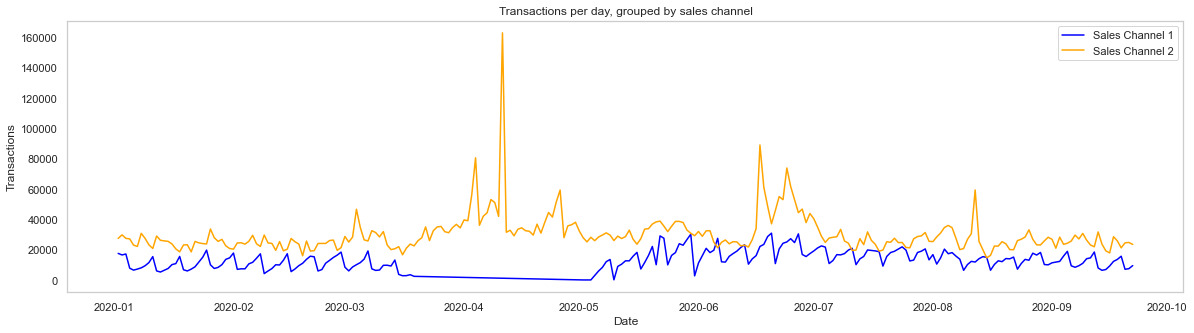

In [6]:
df = transactiondata.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df.columns = ["Date", "Sales Channel Id", "Transactions"]
df.loc[:,'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(1, 1, figsize=(20,5))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Orange")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by sales channel")
plt.show()

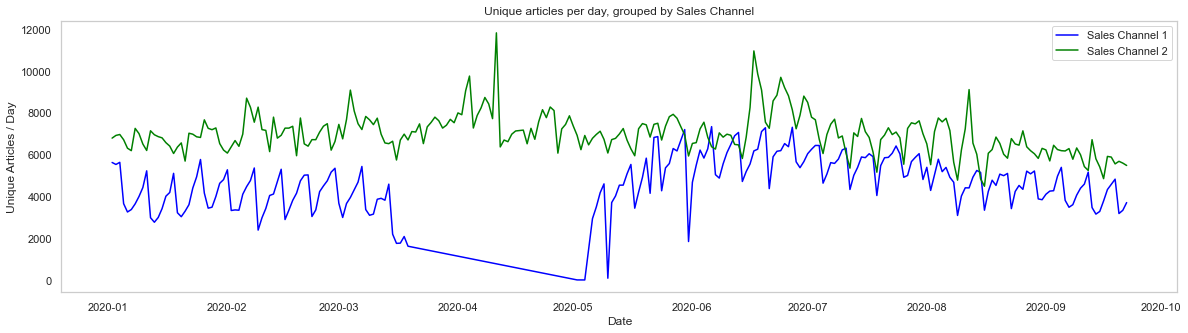

In [7]:
df = transactiondata.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
df.loc[:,'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(1, 1, figsize=(20,5))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()

Interesting Findings: We extract general trends from the transactions dataset per Sales Channel. There is a weird lull period of sales channel 1. Transactions seem to ebb and flow each week in a very cyclically manner. Can help with demand prediction. 

## Let's focus more on Customers now

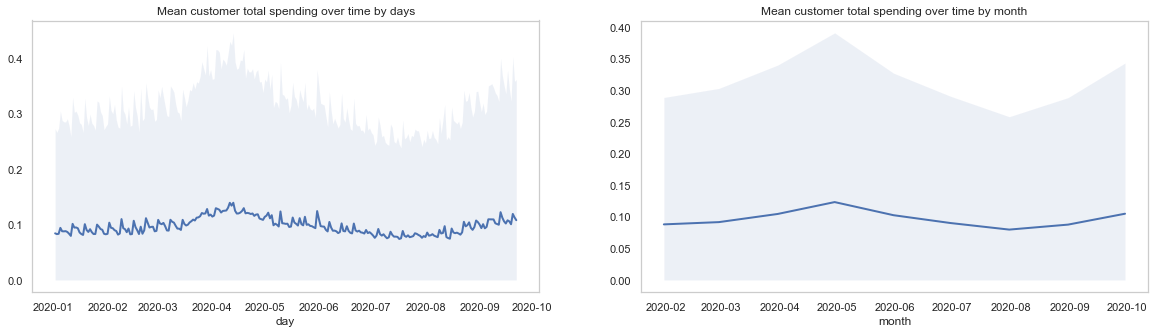

In [33]:
df = transactiondata.copy()
df['t_dat'] = pd.to_datetime(df['t_dat']) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
df = df.groupby(["customer_id","t_dat"]).sum()['price'].reset_index(name="total_spending")

series_mean = df[['t_dat', 'total_spending']].groupby("t_dat").mean().fillna(0)
series_std = df[['t_dat', 'total_spending']].groupby("t_dat").std().fillna(0)

ax1.plot(series_mean, linewidth=2)
std_lower_bound = series_mean.values-2*series_std.values
# We bound the lower bound by $0 since customers should not be spending negative amounts.
std_lower_bound = np.array([[0] if x[0] < 0 else x for x in std_lower_bound])
std_upper_bound = series_mean.values+2*series_std.values
ax1.fill_between(series_mean.index, (std_lower_bound).ravel(), 
                             (std_upper_bound).ravel(), alpha=.1)


ax1.set_title(f'Mean customer total spending over time by days')
ax1.set_xlabel('day')


series_mean = df[['t_dat', 'total_spending']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
series_std = df[['t_dat', 'total_spending']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)

ax2.plot(series_mean, linewidth=2)
std_lower_bound = series_mean.values-2*series_std.values
# We bound the lower bound by $0 since customers should not be spending negative amounts.
std_lower_bound = np.array([[0] if x[0] < 0 else x for x in std_lower_bound])
std_upper_bound = series_mean.values+2*series_std.values
ax2.fill_between(series_mean.index, (std_lower_bound).ravel(), 
                             (std_upper_bound).ravel(), alpha=.1)


ax2.set_title(f'Mean customer total spending over time by month')
ax2.set_xlabel('month')
plt.show()

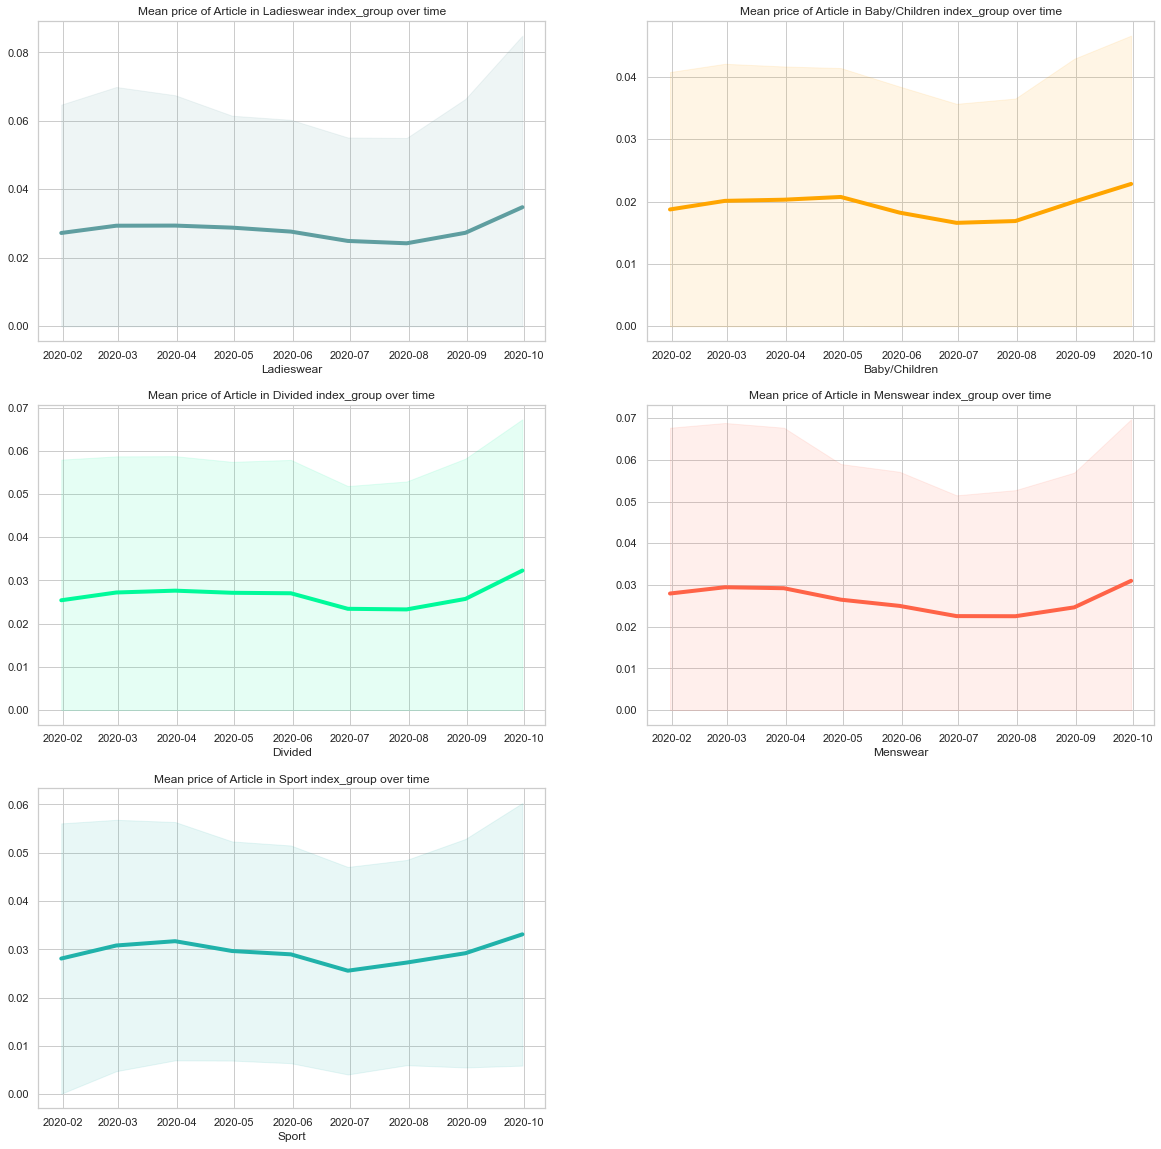

In [445]:
merged_transactions_df['t_dat'] = pd.to_datetime(merged_transactions_df['t_dat']) 

product_list = ['Ladieswear', 'Baby/Children', 'Divided', 'Menswear', 'Sport']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 20))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = merged_transactions_df[merged_transactions_df.index_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            std_lower_bound = series_mean.values-2*series_std.values
            std_lower_bound = np.array([[0] if x[0] < 0 else x for x in std_lower_bound])
            std_upper_bound = series_mean.values+2*series_std.values
            ax[i, j].fill_between(series_mean.index, (std_lower_bound).ravel(), 
                             (std_upper_bound).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean price of Article in {product_list[k]} index_group over time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

Prices in each category didn't vary that much 

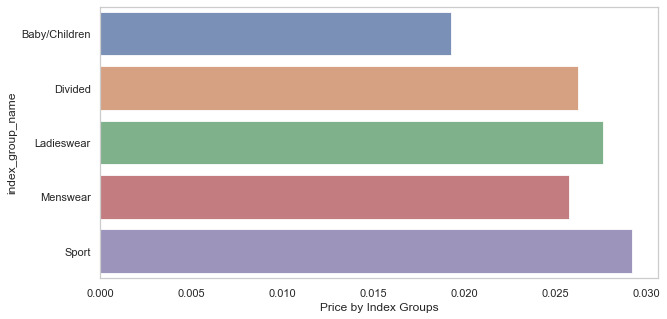

In [214]:
articles_index = merged_transactions_df[['index_group_name', 'price']].groupby('index_group_name').mean()
sb.set_style("whitegrid", {'axes.grid' : False})
f, ax = plt.subplots(figsize=(10,5))
ax = sb.barplot(x=articles_index.price, y=articles_index.index, alpha=0.8)
ax.set_xlabel('Price by Index Groups')
ax.set_ylabel('index_group_name')
plt.show()

### Break down of transactions by age

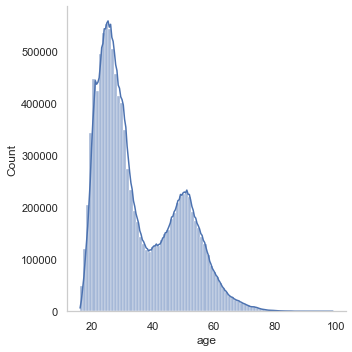

In [15]:
x = all_merged_df["age"]
sb.displot(x, bins=82, kde=True);

In [20]:
all_merged_df['age'].value_counts()

25.0    550577
26.0    541164
24.0    534841
27.0    503949
23.0    494000
         ...  
99.0        35
92.0        34
98.0        30
96.0        29
97.0        23
Name: age, Length: 83, dtype: int64

Most customers were aged 25 with another peak observed at 55. This could be attributed by an abundance of trendy clothing for the younger generation and baby clothes purchased by the older generation for their children/grand children

### Frequency of purchases for Baby/Children Clothing across different ages

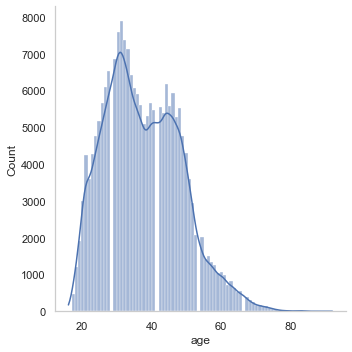

In [23]:
x = all_merged_df[all_merged_df["index_group_name"]=='Baby/Children']["age"]
sb.displot(x, bins=82, kde=True);

## Focusing on Product Group Names

In [ ]:
filtered_merged_df = merged_transactions_df[['price','product_group_name']]
f, ax = plt.subplots(figsize=(25,25))
ax = sb.boxplot(data=filtered_merged_df, x='price', y='product_group_name', order=filtered_merged_df.sort_values('price').product_group_name)
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Product Group Names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

### Average price of items in each clothing category

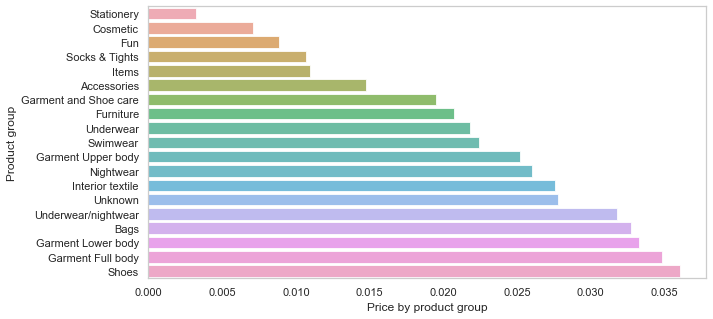

In [215]:
sb.set_style("whitegrid", {'axes.grid' : False})
articles_index = merged_transactions_df[['product_group_name', 'price']].groupby('product_group_name').mean()
f, ax = plt.subplots(figsize=(10,5))
ax = sb.barplot(x=articles_index.price, y=articles_index.index, alpha=0.8, order=articles_index.sort_values('price').index)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Shoes seem to be generally more expensive than other clothing items in H&M

In [199]:
print(txns_by_saleschannel.sales_channel_id.unique())

txns_by_saleschannel = transactiondata.copy()
# txns_by_saleschannel.loc[txns_by_saleschannel['sales_channel_id'] == 1]
txns_by_saleschannel.groupby(['customer_id','sales_channel_id','t_dat'])['article_id'].count()

[2 1]


customer_id                                                       sales_channel_id  t_dat     
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657  1                 2020-09-05    1
                                                                  2                 2020-03-21    5
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa  1                 2020-03-01    1
                                                                                    2020-07-08    1
                                                                  2                 2020-01-21    9
                                                                                                 ..
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264  2                 2020-09-08    3
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a  1                 2020-06-22    1
                                                                  2                 2020-04-05    3
     

### Analyzing trends of customers by Total Transactions and Total Spending habits

In [401]:
transactions_by_id = transactiondata.groupby('customer_id').count()
df = pd.DataFrame(transactions_by_id.sort_values(by='price', ascending=False)['price'][:10])
df.columns = ['Total Transactions']
print(df)

                                                    Total Transactions
customer_id                                                           
b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a51...                 790
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee98...                 738
4308983955108b3af43ec57f0557211e44462a563323835...                 643
67931690bdf18d2e328854ae772cd5ce2505fdc11164693...                 616
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df5...                 613
03fdb0bf2d9ff8ba23e1b4aef53709119aad5bc83691d89...                 590
f874a19b8d3417b8a7eeffa3cecd595a5f6383e0876da28...                 587
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca...                 584
7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae465...                 543
863f0e03da282ae32a76775ce55d8a4605a85c84a26066e...                 539


In [71]:
spending_by_id = transactiondata.groupby('customer_id').sum()
df = pd.DataFrame(spending_by_id.sort_values(by='price', ascending=False)['price'][:10])
df.columns = ['Total Spending']
print(df.reset_index())

                                         customer_id  Total Spending
0  863f0e03da282ae32a76775ce55d8a4605a85c84a26066...        33.07593
1  b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...        29.78998
2  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...        21.62464
3  03d0011487606c37c1b1ed147fc72f285a50c05f00b971...        21.45612
4  77db96923d20d40532eba0020b55cd91eb51358885c2d6...        21.38700
5  a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...        20.37000
6  7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae46...        19.87612
7  b4db5e5259234574edfff958e170fe3a5e13b6f146752c...        18.56707
8  e238725cbff3774b711407cc000f42c0ddabf6b07eb0e3...        18.20598
9  a3ab708684132c6bbd3dad7aa41f9b9c7d1c95d7d5cb1a...        17.84576


We see that there are a few customers which appear as the most number of total transactions as well as total spending. The lack of overlaps signify customers who may have fewer transactions but of a higher quantum! 

### 1.Which index_group_name does most transactions belong to?
### 2.Which index_group do customers spend most on?

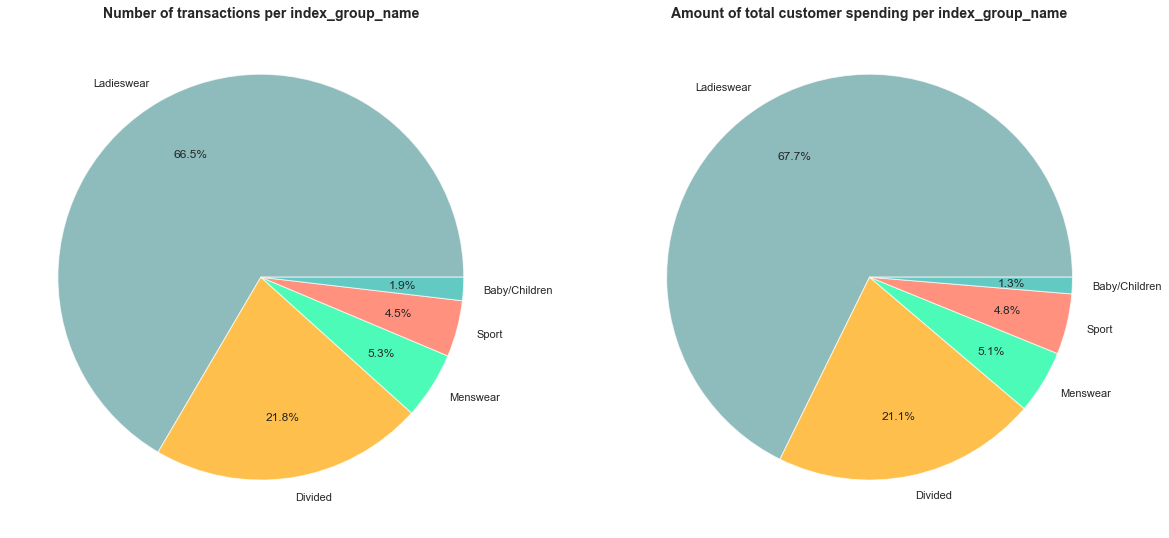

In [209]:
t_dat_by_index_group = merged_transactions_df.groupby('index_group_name').count()['t_dat']
result_df = t_dat_by_index_group.reset_index().sort_values(by='t_dat', ascending=False)
# print(pd.DataFrame(result_df))

t_spending_by_index_group = merged_transactions_df.groupby('index_group_name').sum()['price']
result_df2 = t_spending_by_index_group.reset_index().sort_values(by='price', ascending=False)
# print(pd.DataFrame(result_df2))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
# explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
  
# Pie Chart
ax1.pie(result_df['t_dat'], labels=result_df['index_group_name'],
        autopct='%1.1f%%', pctdistance=0.7, colors=colors, wedgeprops={'alpha':0.7})
ax1.set_title('Number of transactions per index_group_name', fontweight='bold', fontsize='14')
  
# # draw circle
# centre_circle = plt.Circle((0, 0), 0.5, fc='white')
# fig = plt.gcf()
  
# # Adding Circle in Pie chart
# fig.gca().add_artist(centre_circle)
  
ax2.pie(result_df2['price'], labels=result_df2['index_group_name'],
        autopct='%1.1f%%', pctdistance=0.7, colors=colors, wedgeprops={'alpha':0.7})
ax2.set_title('Amount of total customer spending per index_group_name', fontweight='bold', fontsize='14')
  
# Add Legends
# plt.legend(result_df['index_group_name'], loc="upper right")
  
# Displaying Chart
plt.show()

### Which index_group_name has increasing sales to unique customers in the past year

Finding out the more popular index_group_name so we know which group to recommend those items from given the persons' age group and spending. 

In [37]:
df = merged_transactions_df.loc[:,['t_dat', 'customer_id', 'index_group_name']]
df.loc[:,'t_dat'] = pd.to_datetime(df['t_dat'], format='%Y-%m-%d')
df = df.groupby(['t_dat','index_group_name'])['customer_id'].nunique().reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t_dat             1325 non-null   datetime64[ns]
 1   index_group_name  1325 non-null   object        
 2   customer_id       1325 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ KB


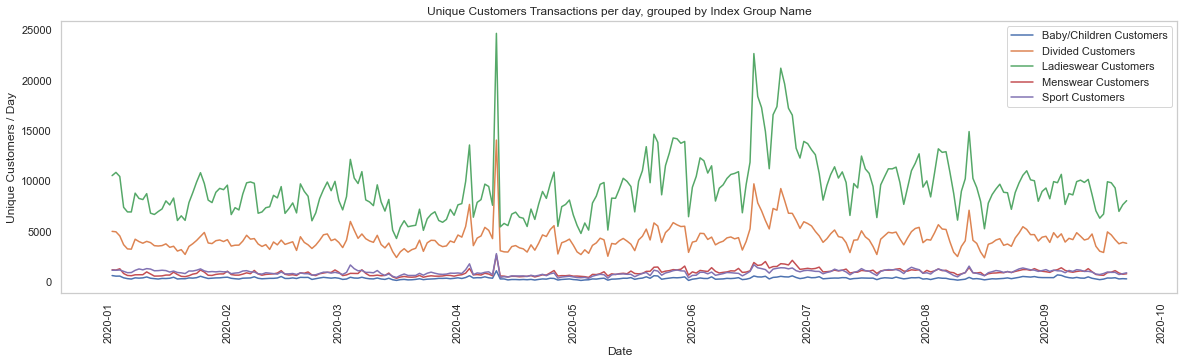

In [25]:
# date_form = DateFormatter("%m")
# ax.xaxis.set_major_formatter(date_form)
# # Ensure ticks fall once every other week (interval=2) 
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

df = merged_transactions_df.loc[:,['t_dat', 'customer_id', 'index_group_name']]
df.loc[:,'t_dat'] = pd.to_datetime(df['t_dat'], format='%Y-%m-%d')
df = df.groupby(["t_dat", "index_group_name"])["customer_id"].nunique().reset_index()
df.columns = ["Date", "Index Group Name", "Unique Customers"]
fig, ax = plt.subplots(1, 1, figsize=(20,5))
g1 = ax.plot(df.loc[df["Index Group Name"]=="Baby/Children", "Date"], df.loc[df["Index Group Name"]=="Baby/Children", "Unique Customers"], label="Baby/Children Customers")
g2 = ax.plot(df.loc[df["Index Group Name"]=="Divided", "Date"], df.loc[df["Index Group Name"]=="Divided", "Unique Customers"], label="Divided Customers")
g3 = ax.plot(df.loc[df["Index Group Name"]=="Ladieswear", "Date"], df.loc[df["Index Group Name"]=="Ladieswear", "Unique Customers"], label="Ladieswear Customers")
g4 = ax.plot(df.loc[df["Index Group Name"]=="Menswear", "Date"], df.loc[df["Index Group Name"]=="Menswear", "Unique Customers"], label="Menswear Customers")
g5 = ax.plot(df.loc[df["Index Group Name"]=="Sport", "Date"], df.loc[df["Index Group Name"]=="Sport", "Unique Customers"], label="Sport Customers")
plt.xlabel("Date")
plt.ylabel("Unique Customers / Day")
ax.legend()
plt.title(f"Unique Customers Transactions per day, grouped by Index Group Name")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

We observe there is a very close relationship when it comes to the changes in number of unique customer purchases across different index groups over time. 

### Does this trend apply even within each product group?

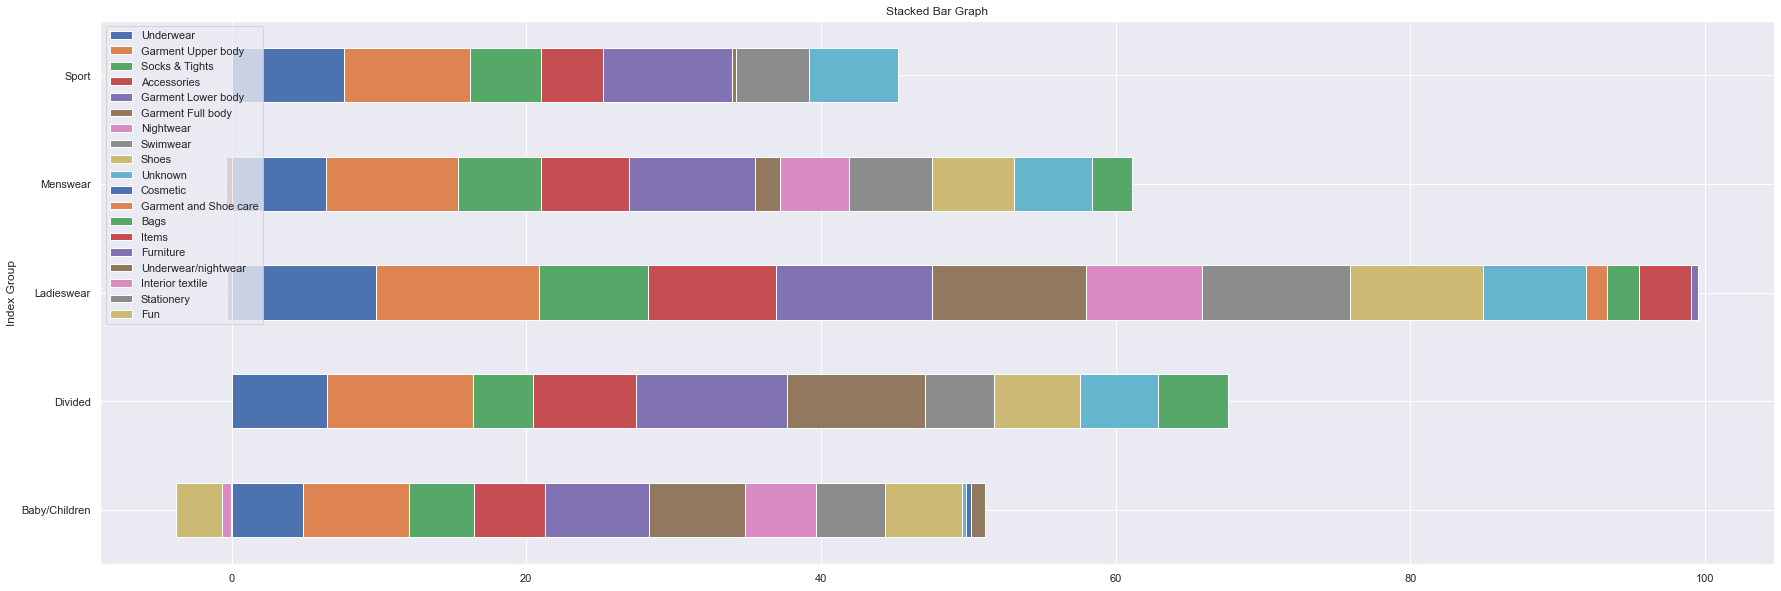

In [85]:
temp = merged_transactions_df[['index_group_name', 'product_group_name', 'price']]
result = pd.DataFrame(temp.groupby(['index_group_name', 'product_group_name'])['price'].sum())
# result.index
# result.loc[('Baby/Children', 'Accessories')].item()
# category_list = ['Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport']
# list(temp.product_group_name.unique())

# product_groups = list(temp.product_group_name.unique())
# result_arr = []
# for category in category_list:
#     arr = [category]
#     for subcategory in product_groups:
#         arr.append(result.price.get((category, subcategory), 0))
#     result_arr.append(arr)

    
# columns = ['Index Group', 'Underwear', 'Garment Upper body', 'Socks & Tights', 'Accessories', 'Garment Lower body', 'Garment Full body', 'Nightwear', 'Swimwear', 'Shoes', 'Unknown', 'Cosmetic', 'Garment and Shoe care', 'Bags', 'Items', 'Furniture', 'Underwear/nightwear', 'Interior textile', 'Stationery', 'Fun']
# plot_df = pd.DataFrame(result_arr, columns = columns)
# plot_df.plot(x='Index Group', kind='barh', stacked=True, title='Stacked Bar Graph', figsize = (20,10))
# plt.show()

log_result = pd.DataFrame(np.log(temp.groupby(['index_group_name', 'product_group_name'])['price'].sum()))

product_groups = list(temp.product_group_name.unique())
result_arr = []
for category in category_list:
    arr = [category]
    for subcategory in product_groups:
        arr.append(log_result.price.get((category, subcategory), 0))
    result_arr.append(arr)

    
columns = ['Index Group', 'Underwear', 'Garment Upper body', 'Socks & Tights', 'Accessories', 'Garment Lower body', 'Garment Full body', 'Nightwear', 'Swimwear', 'Shoes', 'Unknown', 'Cosmetic', 'Garment and Shoe care', 'Bags', 'Items', 'Furniture', 'Underwear/nightwear', 'Interior textile', 'Stationery', 'Fun']
plot_df = pd.DataFrame(result_arr, columns = columns)
plot_df.plot(x='Index Group', kind='barh', stacked=True, title='Stacked Bar Graph', figsize = (30, 10))
plt.legend(loc='upper left')
plt.show()

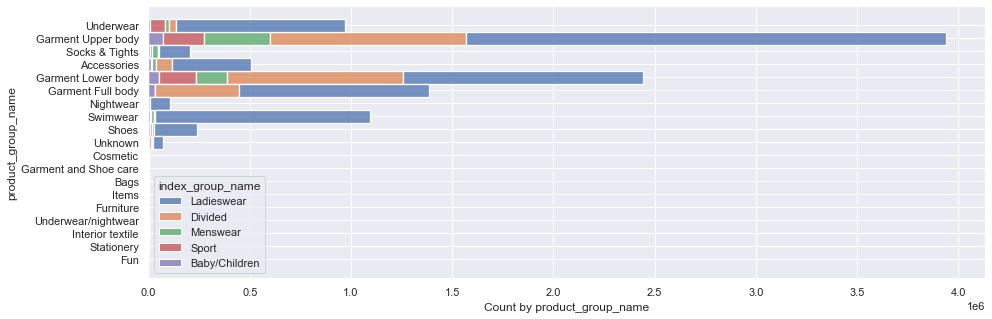

In [88]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sb.histplot(data=merged_transactions_df, y='product_group_name', hue='index_group_name', multiple="stack")
# ax.set_xscale('log')
ax.set_xlabel('Count by product_group_name')
ax.set_ylabel('product_group_name')
plt.show()
